<a href="https://colab.research.google.com/github/Saurabh08281997/ControlNetStableDiffusion/blob/main/ControlNetStableDiffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python transformers accelerate

In [ ]:
!pip3 install -U git+https://github.com/huggingface/diffusers.git

In [ ]:
# !pip install opencv-python transformers accelerate
from diffusers import StableDiffusionXLControlNetPipeline, ControlNetModel, AutoencoderKL
from diffusers.utils import load_image
import numpy as np
import torch
import cv2
from PIL import Image

In [4]:
prompt = "hyper realistic eye level exterior photo of a mid century modern style house overlooking the ocean, daylight, indirect lighting, AD magazine, Frank Lloyd, Eames, Mies van der Rohe"
negative_prompt = "low quality, bad quality, sketches"

In [6]:
# download an image
input_image = load_image(
    "/content/Image.png"
)

In [ ]:
# initialize the models and pipeline
controlnet_conditioning_scale = 0.5
controlnet = ControlNetModel.from_pretrained(
    "diffusers/controlnet-canny-sdxl-1.0-mid",
    torch_dtype=torch.float16
)
vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)

In [8]:
pipe = StableDiffusionXLControlNetPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    controlnet=controlnet,
    vae=vae,
    torch_dtype=torch.float16,
)
pipe.enable_model_cpu_offload()

In [10]:
# get canny image
input_image = np.array(input_image)
input_image = cv2.Canny(input_image, 100, 200)
input_image = input_image[:, :, None]
input_image = np.concatenate([input_image, input_image, input_image], axis=2)
input_canny_image = Image.fromarray(input_image)

In [11]:
# generate image
output_image = pipe(
    prompt, controlnet_conditioning_scale=controlnet_conditioning_scale, image=input_canny_image
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

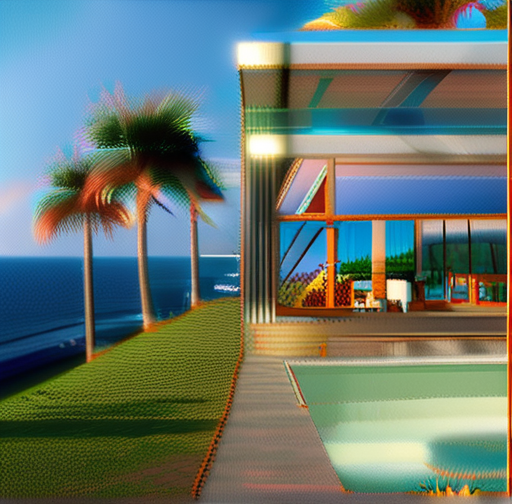

In [14]:
output_image

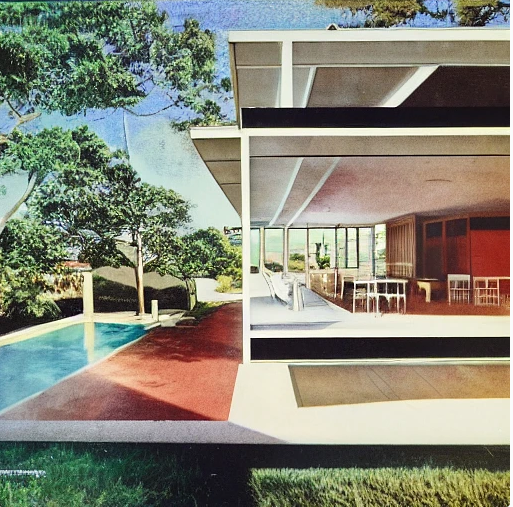

In [15]:
load_image(
    "/content/Image.png"
)